In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Cleaning data for question 3

In [2]:
#uploading merged data set

In [3]:
mergeddataset=pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\2006and2007mergeddataset.csv")

### Creating a data set with Destination

In [4]:
#left merging airports data set to merged data set of 2006 and 2007 years

In [5]:
#renaming the column "iata" to "Destination" to make a left merge

In [6]:
datasetairports = pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\airports.csv")
datasetairports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [7]:
datasetairports = datasetairports.rename(columns={"iata": "Dest"})

In [8]:
datasetairports.columns

Index(['Dest', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')

In [9]:
mergedwithdestairports = pd.merge (mergeddataset, datasetairports , on="Dest", how="left")
mergedwithdestairports

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,airport,city,state,country,lat,long
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,0,0,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,0,0,0,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,0,0,0,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,0,0,0,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,0,0,0,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595098,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,0,0,0,0,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
14595099,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,0,0,0,0,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773
14595100,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,0,15,0,0,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
14595101,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,0,0,0,36,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944


In [10]:
#extracting the desired columns for question 3 Destination dataset

In [11]:
q3destdataset=mergedwithdestairports[["Dest","Month","Year","airport","state","lat","long"]]
q3destdataset

,Dest,Month,Year,airport,state,lat,long
0,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
1,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
2,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
3,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
4,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
...,...,...,...,...,...,...,...
14595098,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944
14595099,SLC,12,2007,Salt Lake City Intl,UT,40.788388,-111.977773
14595100,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944
14595101,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944


In [12]:
#checking for null values

In [13]:
pd.isnull(q3destdataset).sum(axis=0)

Dest           0
Month          0
Year           0
airport        0
state      10318
lat            0
long           0
dtype: int64

In [14]:
#dropping null values

In [15]:
q3destdataset = q3destdataset.dropna()
q3destdataset

,Dest,Month,Year,airport,state,lat,long
0,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
1,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
2,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
3,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
4,PHX,1,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056
...,...,...,...,...,...,...,...
14595098,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944
14595099,SLC,12,2007,Salt Lake City Intl,UT,40.788388,-111.977773
14595100,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944
14595101,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944


In [16]:
#rechecking for null values

In [17]:
pd.isnull(q3destdataset).sum(axis=0)

Dest       0
Month      0
Year       0
airport    0
state      0
lat        0
long       0
dtype: int64

### Line graph to show flight frequency by month

In [18]:
#creating an array with month,year and destination

In [19]:
q3dataset=mergedwithdestairports[["Dest","Month","Year"]]
q3dataset

,Dest,Month,Year
0,PHX,1,2006
1,PHX,1,2006
2,PHX,1,2006
3,PHX,1,2006
4,PHX,1,2006
...,...,...,...
14595098,ATL,12,2007
14595099,SLC,12,2007
14595100,ATL,12,2007
14595101,ATL,12,2007


In [20]:
#checking for null values

In [21]:
pd.isnull(q3dataset).sum(axis=0)

Dest     0
Month    0
Year     0
dtype: int64

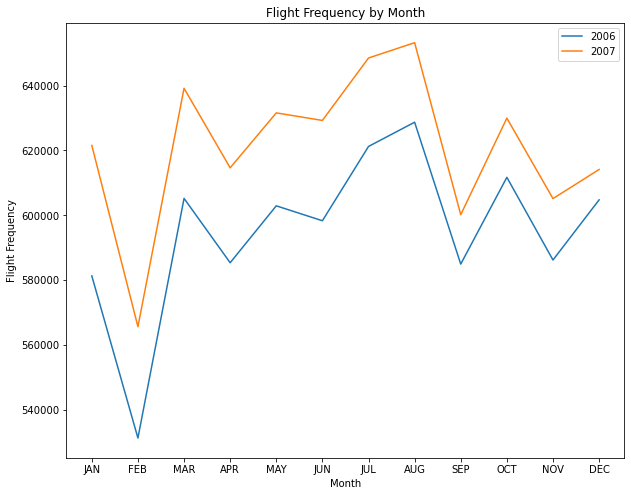

In [22]:
data2006 = q3dataset[q3dataset['Year'] == 2006]
data2007 = q3dataset[q3dataset['Year'] == 2007]
freq2006 = data2006.groupby('Month')['Dest'].count()
freq2007 = data2007.groupby('Month')['Dest'].count()
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(freq2006.index, freq2006.values, label='2006')
ax.plot(freq2007.index, freq2007.values, label='2007')
ax.set_xlabel('Month')
ax.set_ylabel('Flight Frequency')
ax.set_title('Flight Frequency by Month')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"])
ax.legend()
plt.show()

In [23]:
#Heat Map on how airports were used during the months on a map

In [24]:
import calendar
import os

US_BOUNDS = ((24.526, -127.792), (49.384, -65.424))

# create the maps directory if it does not exist
if not os.path.exists("./maps"):
    os.makedirs("./maps")

years = q3destdataset['Year'].unique()
months = q3destdataset['Month'].unique()

for year in years:
    for month in months:
        filtered_data = q3destdataset[(q3destdataset['Year'] == year) & (q3destdataset['Month'] == month)]
        groups = filtered_data.groupby(['lat', 'long', 'Month', 'Year']).size().reset_index(name='count')
        heat_data = [[row['lat'], row['long'], row['count']] for index, row in groups.iterrows()]
        map = folium.Map(location=[39.8283, -98.5795], zoom_start=4, max_bounds=True)
        month_str = calendar.month_abbr[month]
        title_html = f'<h2>Frequency Map for {month_str} {year}</h2>'
        HeatMap(heat_data).add_to(map)
        map.get_root().html.add_child(folium.Element(title_html))
        filename = f"map_{month_str}_{year}.html"
        filepath = os.path.join(".", "maps", filename)
        map.save(filepath)

        display(map)


### Line graph to show top 5 states frequencies by month

In [25]:
# creating a new column by combining the year and month column

In [26]:
q3destdataset["Month"] = q3destdataset["Month"].astype(str)
q3destdataset["Month"] = q3destdataset["Month"].apply(lambda x: x if len(x)==2 else "0"+ x)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17420\1343416948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3destdataset["Month"] = q3destdataset["Month"].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17420\1343416948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3destdataset["Month"] = q3destdataset["Month"].apply(lambda x: x if len(x)==2 else "0"+ x)


In [27]:
q3destdataset["yearnmonth"] = q3destdataset["Year"].astype(str) + "-" + q3destdataset["Month"].astype(str)
q3destdataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_17420\1151955030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3destdataset["yearnmonth"] = q3destdataset["Year"].astype(str) + "-" + q3destdataset["Month"].astype(str)


,Dest,Month,Year,airport,state,lat,long,yearnmonth
0,PHX,01,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056,2006-01
1,PHX,01,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056,2006-01
2,PHX,01,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056,2006-01
3,PHX,01,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056,2006-01
4,PHX,01,2006,Phoenix Sky Harbor International,AZ,33.434167,-112.008056,2006-01
...,...,...,...,...,...,...,...,...
14595098,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944,2007-12
14595099,SLC,12,2007,Salt Lake City Intl,UT,40.788388,-111.977773,2007-12
14595100,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944,2007-12
14595101,ATL,12,2007,William B Hartsfield-Atlanta Intl,GA,33.640444,-84.426944,2007-12


In [28]:
#finding the frequency destination for each state

In [29]:
top3airports = q3destdataset.groupby("state").count().reset_index().iloc[:,:2]
top3airports.head()

,state,Dest
0,AK,83676
1,AL,82697
2,AR,66360
3,AZ,489919
4,CA,1751991


In [30]:
#sorting to get the top 3 states

In [31]:
top3airports.sort_values(by=["Dest"],ascending=False,inplace=True)
top3airports.head(3)

,state,Dest
4,CA,1751991
43,TX,1603333
13,IL,991905


In [32]:
#listing them 

In [33]:
top3states=list(top3airports[:3]["state"].values)
top3states

['CA', 'TX', 'IL']

In [34]:
#grouping the top 3 states by month and year

In [35]:
top3airportsmonth = q3destdataset.groupby(by=["state","yearnmonth"]).count().reset_index().iloc[:,:3]
top3airportsmonth

,state,yearnmonth,Dest
0,AK,2006-01,3070
1,AK,2006-02,2767
2,AK,2006-03,3194
3,AK,2006-04,3083
4,AK,2006-05,3560
...,...,...,...
1235,WY,2007-08,938
1236,WY,2007-09,817
1237,WY,2007-10,628
1238,WY,2007-11,614


In [36]:
top3airportsmonth = top3airportsmonth[top3airportsmonth["state"].isin(top3states)].copy()
top3airportsmonth

,state,yearnmonth,Dest
96,CA,2006-01,70483
97,CA,2006-02,64131
98,CA,2006-03,72161
99,CA,2006-04,69912
100,CA,2006-05,73175
...,...,...,...
1043,TX,2007-08,68372
1044,TX,2007-09,63625
1045,TX,2007-10,67233
1046,TX,2007-11,64133


In [37]:
#sorting values in year month

In [38]:
top3airportsmonth.sort_values(by=["yearnmonth"],ascending=True,inplace=True)
top3airportsmonth.head()

,state,yearnmonth,Dest
96,CA,2006-01,70483
1024,TX,2006-01,65750
304,IL,2006-01,40860
97,CA,2006-02,64131
1025,TX,2006-02,60310


In [39]:
top3airportsmonth.dtypes

state         object
yearnmonth    object
Dest           int64
dtype: object

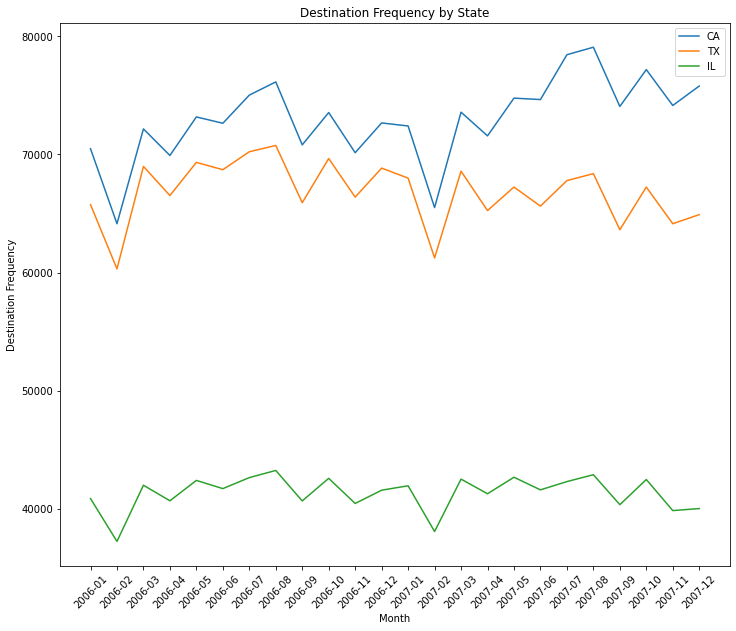

In [40]:
fig, ax = plt.subplots(figsize=[12,10])

for state in top3states:
    state_data = top3airportsmonth[top3airportsmonth['state'] == state]
    ax.plot(state_data['yearnmonth'], state_data['Dest'], label=state)
plt.xticks(rotation=45)    
ax.set_xlabel('Month')
ax.set_ylabel('Destination Frequency')
ax.set_title('Destination Frequency by State')
ax.legend()
plt.show()